In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df_all = pd.read_hdf('/scratch/musella/merged_withb.hd5')
df=df_all.head(1000)

Opening /scratch/musella/merged_withb.hd5 in read-only mode


In [4]:
df.shape

(1000, 183)

In [5]:
# what's in the dataframe
df.columns.values

array(['weight', 'genMass', 'genPt', 'genRapidity', 'genPhi', 'recoMass',
       'recoPt', 'recoEta', 'recoRapidity', 'recoPhi', 'recoLeadPt',
       'recoSubleadPt', 'recoLeadEta', 'recoSubleadEta', 'recoLeadPhi',
       'recoSubleadPhi', 'leadmva', 'subleadmva', 'genJet2p5Eta0',
       'genJet2p5Pt0', 'genJet2p5Pt5', 'genNjets2p5', 'rho', 'nvtx',
       'event', 'lumi', 'processIndex', 'run', 'sigmarv', 'sigmawv',
       'sigmaMoM_decorr', 'vtxprob', 'CosPhi', 'recoNjets2p5',
       'recoJet2p5Energy0', 'recoJet2p5Pt0', 'recoJet2p5Eta0',
       'recoJet2p5Phi0', 'recoJet2p5Rapidity0', 'recoJet2p5Pujetidmva0',
       'recoJet2p5Energy1', 'recoJet2p5Pt1', 'recoJet2p5Eta1',
       'recoJet2p5Phi1', 'recoJet2p5Rapidity1', 'recoJet2p5Pujetidmva1',
       'recoJet2p5Energy2', 'recoJet2p5Pt2', 'recoJet2p5Eta2',
       'recoJet2p5Phi2', 'recoJet2p5Rapidity2', 'recoJet2p5Pujetidmva2',
       'recoJet2p5Energy3', 'recoJet2p5Pt3', 'recoJet2p5Eta3',
       'recoJet2p5Phi3', 'recoJet2p5Rapidity3'

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# recoPts = filter(lambda x: 'reco' in x and 'Pt' in x, df.columns)
# print(recoPts)
# for var in recoPts:
#     newvar = var.replace("Pt","PtOverM")
    

In [8]:
for var in 'recoPt','recoLeadPt','recoSubleadPt':
    newvar = var.replace("Pt","PtOverM")
    df[newvar] = df[var] / df['recoMass']

# df[['recoPtOverM','recoLeadPtOverM','recoSubleadPtOverM']] = df[[]] / df['recoMass']

/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [9]:
jetsPhis = filter(lambda x: 'recoJet' in x and 'Phi' in x and not 'Delta' in x, df.columns) 
print(jetsPhis)
for var in jetsPhis:
    newvar = var.replace("Phi","DeltaPhi")
    df.loc[df[var] < -10., var] = np.nan
    df[newvar] = np.cos(df['recoPhi'] - df[var])
    # df.loc[df[newvar] > 2.*np.pi, newvar] -= 2.*np.pi

/swshare/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


['recoJet2p5Phi0', 'recoJet2p5Phi1', 'recoJet2p5Phi2', 'recoJet2p5Phi3', 'recoJet2p5Phi4', 'recoJet2p5Phi5', 'recoJet4p7Phi0', 'recoJet4p7Phi1', 'recoJet4p7Phi2', 'recoJet4p7Phi3', 'recoJet4p7Phi4', 'recoJet4p7Phi5']


In [10]:
jetsRapidities = filter(lambda x: 'recoJet' in x and 'Rapidity' in x and not 'Delta' in x, df.columns) 
print(jetsRapidities)
for var in jetsRapidities:
    newvar = var.replace("Rapidity","DeltaRapidity")
    df.loc[df[var] < -10., var] = np.nan
    df[newvar] = np.abs(df['recoRapidity'] - df[var])


['recoJet2p5Rapidity0', 'recoJet2p5Rapidity1', 'recoJet2p5Rapidity2', 'recoJet2p5Rapidity3', 'recoJet2p5Rapidity4', 'recoJet2p5Rapidity5', 'recoJet4p7Rapidity0', 'recoJet4p7Rapidity1', 'recoJet4p7Rapidity2', 'recoJet4p7Rapidity3', 'recoJet4p7Rapidity4', 'recoJet4p7Rapidity5']


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


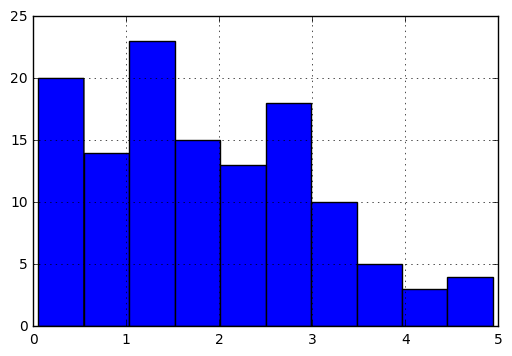

In [11]:
df['recoJet4p7DeltaRapidity2'].hist()

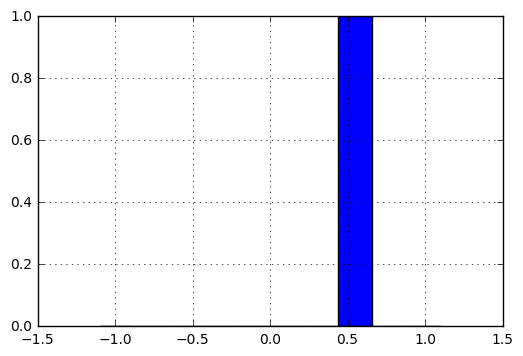

In [12]:
df['recoJet2p5Pujetidmva5'].hist(range=[-1.1,1.1])  


In [13]:
#train, test = train_test_split(df,test_size=0.2,random_state=12345)

In [14]:
df.columns

Index([u'weight', u'genMass', u'genPt', u'genRapidity', u'genPhi', u'recoMass',
       u'recoPt', u'recoEta', u'recoRapidity', u'recoPhi',
       ...
       u'recoJet2p5DeltaRapidity2', u'recoJet2p5DeltaRapidity3',
       u'recoJet2p5DeltaRapidity4', u'recoJet2p5DeltaRapidity5',
       u'recoJet4p7DeltaRapidity0', u'recoJet4p7DeltaRapidity1',
       u'recoJet4p7DeltaRapidity2', u'recoJet4p7DeltaRapidity3',
       u'recoJet4p7DeltaRapidity4', u'recoJet4p7DeltaRapidity5'],
      dtype='object', length=210)

In [15]:
features = ['recoPtOverM','recoRapidity', 'recoPhi','recoLeadPtOverM','recoSubleadPtOverM','recoLeadEta','recoSubleadEta']
features += [#'sigmarv','sigmawv',
            'leadmva','subleadmva','sigmaMoM_decorr',
            'vtxprob','CosPhi']
features += ['recoNjets2p5','recoNjets4p7']


jetsId = filter(lambda x: 'recoJet' in x and 'Pujetidmva' in x, df.columns)
jetsEta = filter(lambda x: 'recoJet' in x and 'Eta' in x and not 'Delta' in x, df.columns)
jetsPt = filter(lambda x: 'recoJet' in x and 'Pt' in x and not 'Delta' in x, df.columns)
jetsDeltas = filter(lambda x: 'recoJet' in x and 'Delta' in x, df.columns)

features += jetsEta + jetsPt + jetsDeltas + jetsId

In [16]:
features

['recoPtOverM',
 'recoRapidity',
 'recoPhi',
 'recoLeadPtOverM',
 'recoSubleadPtOverM',
 'recoLeadEta',
 'recoSubleadEta',
 'leadmva',
 'subleadmva',
 'sigmaMoM_decorr',
 'vtxprob',
 'CosPhi',
 'recoNjets2p5',
 'recoNjets4p7',
 'recoJet2p5Eta0',
 'recoJet2p5Eta1',
 'recoJet2p5Eta2',
 'recoJet2p5Eta3',
 'recoJet2p5Eta4',
 'recoJet2p5Eta5',
 'recoJet4p7Eta0',
 'recoJet4p7Eta1',
 'recoJet4p7Eta2',
 'recoJet4p7Eta3',
 'recoJet4p7Eta4',
 'recoJet4p7Eta5',
 'recoJet2p5Pt0',
 'recoJet2p5Pt1',
 'recoJet2p5Pt2',
 'recoJet2p5Pt3',
 'recoJet2p5Pt4',
 'recoJet2p5Pt5',
 'recoJet4p7Pt0',
 'recoJet4p7Pt1',
 'recoJet4p7Pt2',
 'recoJet4p7Pt3',
 'recoJet4p7Pt4',
 'recoJet4p7Pt5',
 'recoJet2p5DeltaPhi0',
 'recoJet2p5DeltaPhi1',
 'recoJet2p5DeltaPhi2',
 'recoJet2p5DeltaPhi3',
 'recoJet2p5DeltaPhi4',
 'recoJet2p5DeltaPhi5',
 'recoJet4p7DeltaPhi0',
 'recoJet4p7DeltaPhi1',
 'recoJet4p7DeltaPhi2',
 'recoJet4p7DeltaPhi3',
 'recoJet4p7DeltaPhi4',
 'recoJet4p7DeltaPhi5',
 'recoJet2p5DeltaRapidity0',
 'recoJet2p5

In [17]:
for var in jetsId + jetsEta + jetsPt:
    df.loc[df[var] == -999, var] = np.nan


In [18]:
# df['recoJet2p5Eta0']
df.loc[df['simpXsBin'] < 0, 'simpXsBin'] = 0

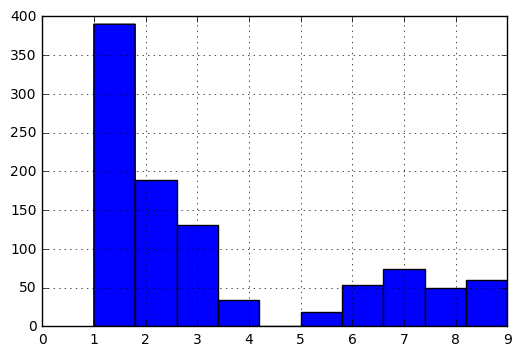

In [19]:
df['simpXsBin'].hist()


In [20]:
# dfS = df.loc[df['simpXsBin'] > 0]

In [21]:
# dfS['sigmarv'].hist(bins=100)
# plt.show()
# (dfS['sigmaMoM_decorr'] / dfS['sigmarv']).hist(bins=100)


In [22]:
def resol_wei(X):
    return X[3]*(1./X[0] * (X[2]) + 1./X[1] * (1.-X[2])) 
df.loc[df['simpXsBin'] > 0, 'weight'] = df.loc[df['simpXsBin'] > 0, ['sigmarv','sigmawv','vtxprob','weight'] ].apply(resol_wei,axis=1,raw=True)

#             = 1./dfS['sigmarv'] * dfS['vtxprob'] + 1./df['sigmawv'] * (1. - dfS['vtxprob'])

In [23]:
# df.loc[df['simpXsBin'] > 0, 'weight'] *= rewei

In [24]:
weiS = df.loc[df['simpXsBin'] > 0,'weight'].sum()
weiB = df.loc[df['simpXsBin'] <= 0,'weight'].sum()

In [25]:
print weiB, weiS

0 16.47816367


In [26]:
#df.loc[df['simpXsBin'] <= 0, 'weight'] *= weiS/weiB

In [27]:
df.loc[df.simpXsBin == 5, 'weight'] *= 3.

In [28]:
df.groupby('simpXsBin')['weight'].agg(['sum','count','mean'])

,sum,count,mean
simpXsBin,,,
1,8.557235,390,0.021942
2,2.862268,189,0.015144
3,2.120214,131,0.016185
4,0.476980,34,0.014029
5,0.507638,18,0.028202
6,0.627825,54,0.011626
7,0.191309,74,0.002585
8,0.889088,50,0.017782
9,0.584032,60,0.009734


In [29]:
target = 'simpXsBin'
weight = 'weight'

X = df[features]
y = df[target]
w = df[weight]

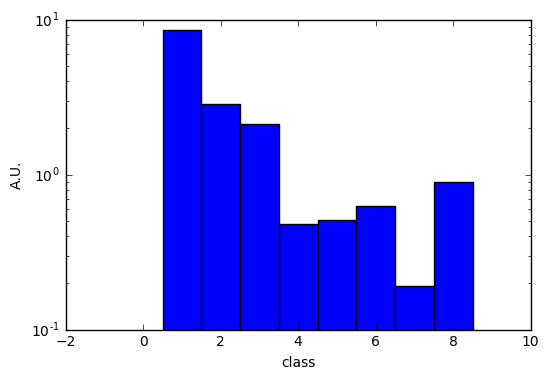

In [30]:
plt.hist(y,weights=w,bins=9,range=[-0.5,8.5])
plt.xlabel('class')
plt.ylabel('A.U.')
plt.yscale('log')

In [31]:
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2,random_state=12345)
w_train = np.abs(w_train)

In [32]:
from xgboost import XGBClassifier

In [33]:
clf = XGBClassifier(max_depth=10, n_estimators=300, nthread=8, objective='multi:softmax', subsample=0.8)

In [34]:
%time clf.fit(X_train,y_train,w_train)

CPU times: user 6.54 s, sys: 69 ms, total: 6.61 s
Wall time: 841 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=8, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [35]:
clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=8, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [36]:
y_pred_prob = clf.predict_proba(X_test)

In [37]:
y_pred_bin = y_pred_prob[:,1:].argmax(axis=1)

In [38]:
y_pred_disc0 = 1. - y_pred_prob[:,0] #/ (1. - y_pred_prob[:,0])
y_pred_disc1 = y_pred_prob[:,1:].max(axis=1) / (y_pred_prob[:,0] + y_pred_prob[:,1:].max(axis=1))
y_pred_disc2 = y_pred_prob[:,1:].max(axis=1) / (y_pred_prob[:,1:].sum(axis=1))

In [39]:
y_pred_disc = np.vstack([y_pred_disc0,y_pred_disc1,y_pred_disc2]).T

In [40]:
y_pred_bin.shape, y_pred_disc.shape

((200,), (200, 3))

In [41]:
#y_pred = clf.predict(X_test)

In [42]:
import itertools

def show_matrix(mtx):
    mig = (mtx / np.sum(mtx,axis=1,keepdims=True)).T * 100.
    print(  (100. - np.diag(mig)).mean() )
    plt.matshow(mig,cmap=plt.cm.Blues,vmin=0,vmax=100)
    thresh = 0.3
    for i, j in itertools.product(range(mtx.shape[0]), range(mtx.shape[1])):
        plt.text(j, i, format(mig[i, j], '.0f'),
                 horizontalalignment="center")
                 #color="white" if mtx[i, j] > thresh else "black")
    plt.ylabel('pred')
    plt.xlabel('true')
    plt.title('Migration matrix')
    plt.colorbar()
    plt.show()

    pur = (mtx / np.sum(mtx,axis=0,keepdims=True)).T * 100.
    plt.matshow( pur,cmap=plt.cm.Reds,vmin=0,vmax=100)
    for i, j in itertools.product(range(mtx.shape[0]), range(mtx.shape[1])):
        plt.text(j, i, format(pur[i, j], '.0f'),
                 horizontalalignment="center")

#     diag = np.diag(pur)*np.identity(pur.shape[0])
#     offdiag = pur - diag 
    print(  (100. - np.diag(pur)).min(), (100. - np.diag(pur)).mean(),(100. - np.diag(pur)).max() )
    plt.xlabel('true')
    plt.ylabel('pred')
    plt.title('Purity matrix')
    plt.colorbar()
    plt.show()


In [43]:
from sklearn.metrics import confusion_matrix



In [45]:
sig = (y_test > 0).values
#print(y_test.shape,y_pred_bin.shape)
#print(y_test[sig].shape,y_pred_bin[sig].shape)
cnf = confusion_matrix(y_test[sig]-1,y_pred_bin[sig],sample_weight=w_test[sig]).astype(np.float32)
cnfInc4p7 = confusion_matrix(df.loc[df['simpXsBin']>0, 'simpXsBin']-1,df.loc[df['simpXsBin']>0,'recoXsBin4p7'],sample_weight=df.loc[df['simpXsBin']>0,'weight']).astype(np.float32)

In [49]:
# y_pred_bin[sig.values].shape

In [50]:
cnf[4] /= 3.
cnfInc4p7[4] /= 3.

14.7074


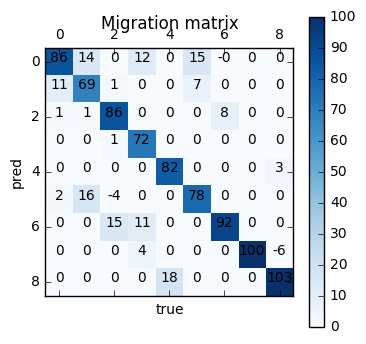

(-1.3982925, 22.56719, 67.393005)


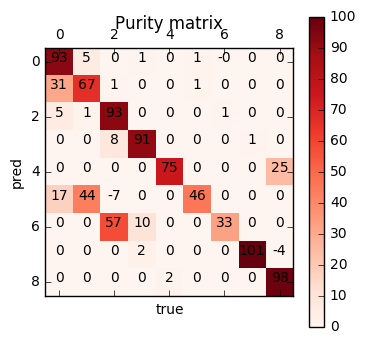

88.0096


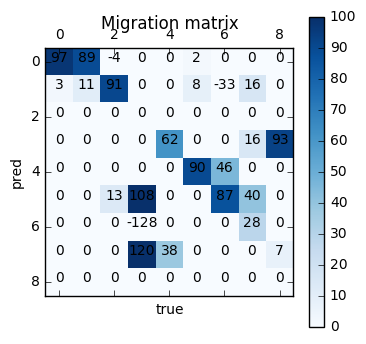

(nan, nan, nan)


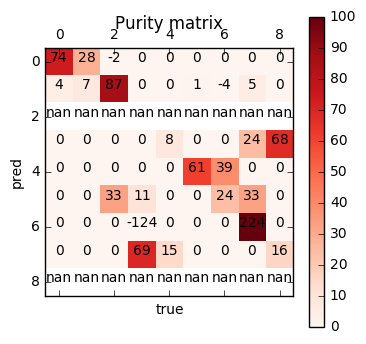

In [51]:
show_matrix(cnfInc4p7)
show_matrix(cnf)

In [52]:
df_test = pd.DataFrame({'y_true' : y_test, 'y_bin' : y_pred_bin, 
                        'y_disc0' : y_pred_disc0, 'y_disc1' : y_pred_disc1,
                        'y_disc2' : y_pred_disc2, 'weight' : w_test})

df_test['sig'] = df_test['y_true'] > 0

In [53]:
from sklearn.metrics import roc_auc_score

gb = df_test.groupby('y_bin')
for key in gb.groups.keys():
    val = gb.get_group(key)
    sig = val['sig'] # & val['y_true']-1 == key
    auc0 = roc_auc_score(sig,val.y_disc0)
    auc1 = roc_auc_score(sig,val.y_disc1)
    print(val[['y_disc0','y_disc1']].corr())
    # auc2 = roc_auc_score(sig,val.y_disc2)
    print(auc0,auc1)#,auc2)
    plt.hist(val[sig].y_disc0, bins=50, range=[0,1],weights=val[sig].weight,normed=True,label='sig')
    plt.hist(val[~sig].y_disc0, bins=50, range=[0,1],weights=val[~sig].weight,normed=True,alpha=0.5,label='bkg')
    plt.title('bin %d' % key)
    plt.xlabel('$1 - p_{bkg}$')
    plt.ylabel('A.U.')
    plt.legend()
    plt.show()
    plt.hist(val[sig].y_disc1, bins=50, range=[0,1],weights=val[sig].weight,normed=True,label='sig')
    plt.hist(val[~sig].y_disc1, bins=50, range=[0,1],weights=val[~sig].weight,normed=True,alpha=0.5,label='bkg')
    plt.title('bin %d' % key)
    plt.xlabel('$p_{sig bin} / (p_{sig bin} + p_{bkg})$')
    plt.ylabel('A.U.')
    plt.legend()
    plt.show()
    #.hist('y_disc1',by='sig',weight='weight',stack=True)


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [54]:
import xgboost

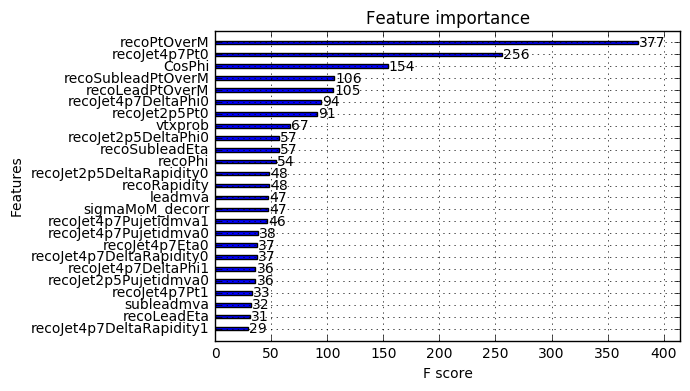

In [55]:
xgboost.plot_importance(clf.get_booster(),importance_type='weight',height=0.3,max_num_features=25)

In [ ]:
# xgboost.plot_importance(clf.get_booster(),importance_type='gain',height=0.3)

In [ ]:
# xgboost.plot_importance(clf.get_booster(),importance_type='cover',height=0.3)